In [1]:
import json
import numpy as np

from matplotlib import pyplot as plt
from string import ascii_uppercase
from itertools import product

INF = (1 << 30)

In [2]:
english = json.load(open("english.json"))
monogram = english["monogram"]
digram = english["digram"]
trigram = english["trigram"]

def read(*files):
    return "".join(open(file).read() for file in files).replace(" ","")

message = read("found1","found2","found3")
password = read("krypton4")

In [3]:
def ngram(n):
    return map(lambda x: "".join(x),product(ascii_uppercase,repeat=n))

freq = [
    { k: count/(len(message)-n)
        for k in ngram(n+1)
        if (count := message.count(k))
    } for n in range(3)
]


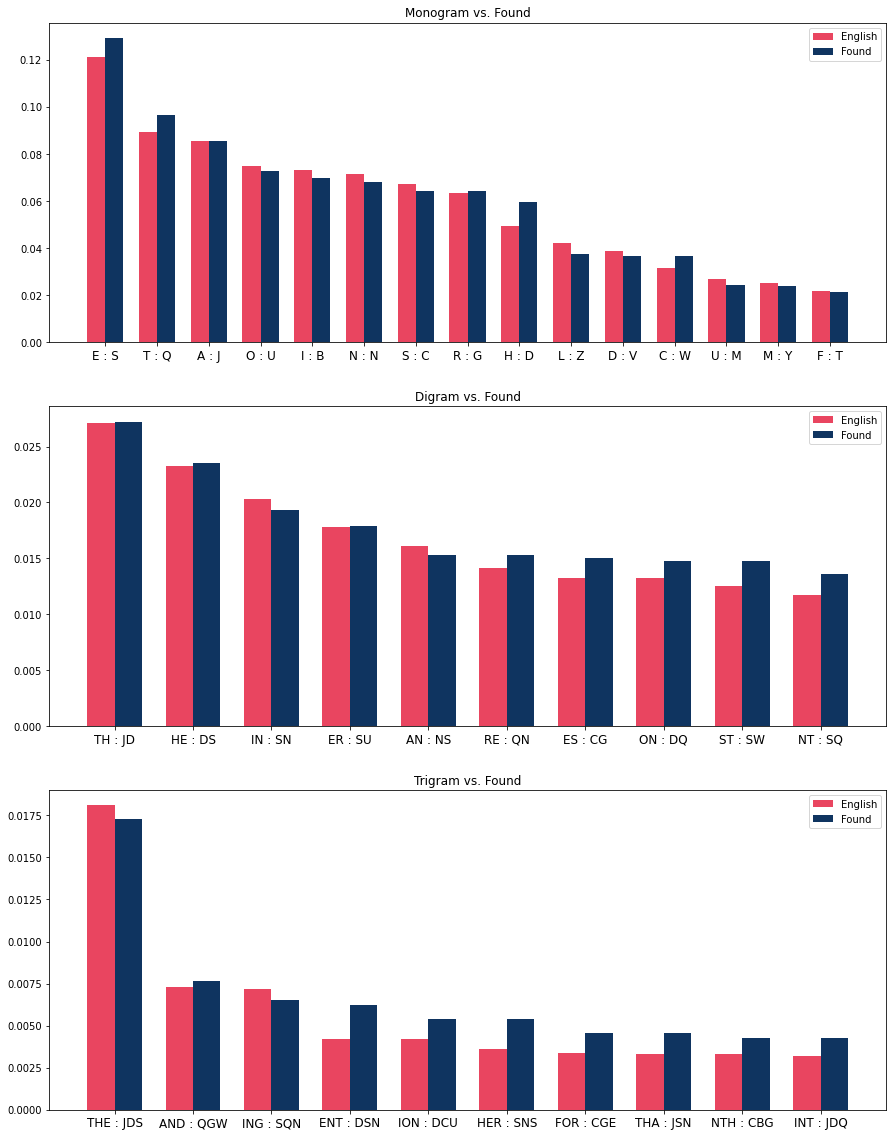

In [4]:
def data_sort(data,lim=INF):
    return list(zip(*sorted(data.items(),key=lambda x: -x[1])[:min(lim,len(data))]))
def data_map(data1,data2,lim=INF):
    return dict(zip(data_sort(data1,lim)[0],data_sort(data2,lim)[0]))
    
fig,ax = plt.subplots(3,1,figsize=(15,20))

def plot(ax,title,data1,data2,limit):
    x = np.arange(limit)
    w = .35
    
    data1_x,data1_y = data_sort(data1,limit)
    data2_x,data2_y = data_sort(data2,limit)
    
    ax.bar(x-w/2,data1_y,w,label="English",color="#E94560")
    ax.bar(x+w/2,data2_y,w,label="Found",color="#0F3460")

    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(map(lambda i,j: f"{i} : {j}",data1_x,data2_x), fontsize=12)

    ax.legend()

plot(ax[0],"Monogram vs. Found",monogram,freq[0],15)
plot(ax[1],"Digram vs. Found",digram,freq[1],10)
plot(ax[2],"Trigram vs. Found",trigram,freq[2],10)
    
None

In [25]:
def decode(d,s=password,r="-"):
    s = "".join((d[c] if c in d else r) for c in s)
    display(s)
        
key = {
    # FAIRLY CERTAIN
    "J": "T",
    "D": "H",
    "S": "E",
    
    # NOT CERTAIN
    "V": "K",
    "I": "Y",
    
    "N": "R",
    
    "C": "I",
    "U": "S"
}

decode(key);

'-EKK---ETHEKEYEK---R--SS--R-IS-R-TE'

In [26]:
score = {i:{j:0 for j in ascii_uppercase} for i in ascii_uppercase}

for k in key:
    score[key[k]][k] = INF

for k,v in data_map(freq[0],monogram).items():
    score[v][k] += freq[0][k] / 2

for K,V in data_map(freq[1],digram).items():
    f = freq[1][K]
    for k,v in zip(K,V):
        if k not in key or key[k] == v:
            score[v][k] += f / 3

score_map = {sorted(score[k].items(),key=lambda t: -t[1])[0][0]:k for k in score}
display(score_map)

display("=" * 100)
decode(score_map)
display("=" * 100)
display(password)
display("=" * 100)
decode(score_map,message)
display("=" * 100);

{'J': 'T',
 'A': 'B',
 'W': 'C',
 'V': 'K',
 'S': 'E',
 'T': 'F',
 'X': 'G',
 'D': 'H',
 'C': 'I',
 'O': 'J',
 'Z': 'L',
 'Y': 'M',
 'N': 'R',
 'U': 'S',
 'K': 'P',
 'P': 'Q',
 'M': 'U',
 'F': 'V',
 'E': 'W',
 'H': 'X',
 'I': 'Y',
 'R': 'Z'}

'===================================================================================================='

'PEKKC--ETHEKEYEKG-URM-SSP-RCISBRUTE'

'===================================================================================================='

'KSVVWBGSJDSVSISVXBMNYQUUKBNWCUANMJS'

'===================================================================================================='

'I-LR-MT-WR-MH--L-ES-RLIMHER-KS-V--P--S-L-ES-RSLIMHERTHESHIGTLIMHERL-ES-RSL-CE-RL-ES-RSHIGTIS--E-GTHESIFMKEST--CF-STPICEK-V--P-E-LR-MTI--TELH-IXUESITIS-T-ME-GSUBSTITUTI--LIMHERI-PHILHE-LHKETTERI-THEMK-I-TEJTISREMK-LECB--KETTERS-FEGIJEC-UFBER-GM-SITI--SC-P-THE-KMH-BETG-REJ-FMKEPITH-SHIGT-G-P-UKCBEREMK-LECB-CBP-UKCBEL-FEE--CS---THEFETH-CIS--FEC-GTERZUKIUSL-ES-RPH-USECITT-L-FFU-IL-TEPITHHISWE-ER-KSTHEE-LR-MTI--STEMMERG-RFECB--L-ES-RLIMHERIS-GTE-I-L-RM-R-TEC-SM-RT-GF-REL-FMKEJSLHEFESSULH-STHEYIWE-RELIMHER--CSTIKKH-SF-CER--MMKIL-TI--I-THER-TS-STEF-SPITH-KKSI-WKE-KMH-BETSUBSTITUTI--LIMHERSTHEL-ES-RLIMHERISE-SIK-BR-VE---CI-MR-LTILE-GGERSESSE-TI-KK---L-FFU-IL-TI--SELURIT-SH-VESME-REMR-CULECF-ST-GHISV--P-P-RVBETPEE---CHISE-RK-MK--SPEREF-I-K-L-FECIES--CHIST-RIESWE-RESHER-ISECT-THEME-V-GS-MHISTIL-TI----C-RTISTR-B-THEE-C-GTHESIJTEE-THLE-TUR--EJTHEPR-TEF-I-K-TR-WECIESU-TIK-B-UTI-LKUCI-WH-FKETVI-WKE-R--CF-LBETHL--SICERECS-FE-GTHEGI-ESTEJ-FMKESI-THEE-WKISHK--WU-WEI-HISK-STMH-SEHEPR-TETR-WIL-FECIES-KS

'===================================================================================================='